# Mushroom Classification Dataset

### This datset lets you classify mushroom safe to eat or deadly poison?

Attribute Information: (classes: edible=e, poisonous=p)
 - cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
 - cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
 - cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
 - bruises: bruises=t,no=f
 - odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
 - gill-attachment: attached=a,descending=d,free=f,notched=n
 - gill-spacing: close=c,crowded=w,distant=d
 - gill-size: broad=b,narrow=n
 - gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
 - stalk-shape: enlarging=e,tapering=t
 - stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
 - stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
 - stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
 - stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 - stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 - veil-type: partial=p,universal=u
 - veil-color: brown=n,orange=o,white=w,yellow=y
 - ring-number: none=n,one=o,two=t
 - ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
 - spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
 - population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
 - habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import CategoricalNB

#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn import preprocessing
from time import time

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#from sklearn.metrics import score

from pandas import read_csv
import pandas as pd
import numpy as np
import os
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
from sklearn import  svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score

# Data Exploration

In [2]:
# Loading the dataset
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [3]:
# Size of the dataset
print("Size of the dataset: ", mushroom.shape)

Size of the dataset:  (8124, 23)


In [4]:
print("Statistical Summary")
mushroom.describe().T

Statistical Summary


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
#Checking for unique values in each column attribute
columns = np.array(mushroom.columns)
for i in columns:
    print("\n",i,"\n",mushroom[i].value_counts())


 class 
 e    4208
p    3916
Name: class, dtype: int64

 cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 bruises 
 f    4748
t    3376
Name: bruises, dtype: int64

 odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 stalk-shape 
 t    4608
e    3516
Name: stalk-

In [6]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

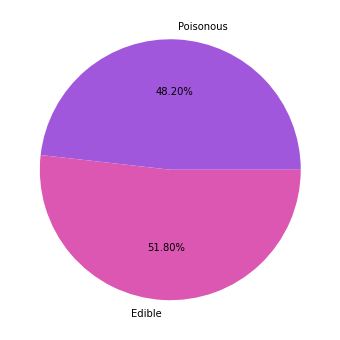

In [7]:
#Plotting the count of class
plt.figure(figsize=(6, 6))
mushrooms = ['Poisonous','Edible']
count = [len(mushroom[mushroom['class'] == 'p']),len(mushroom[mushroom['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='cap-color', ylabel='count'>

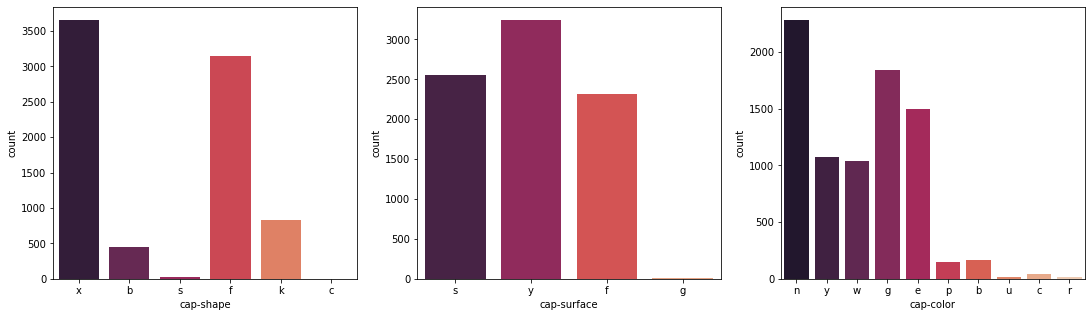

In [8]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='cap-shape', palette='rocket')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='cap-surface', palette='rocket')
ax = fig.add_subplot(1,4,3)
sns.countplot(data=mushroom,x='cap-color', palette='rocket')

<AxesSubplot:xlabel='odor', ylabel='count'>

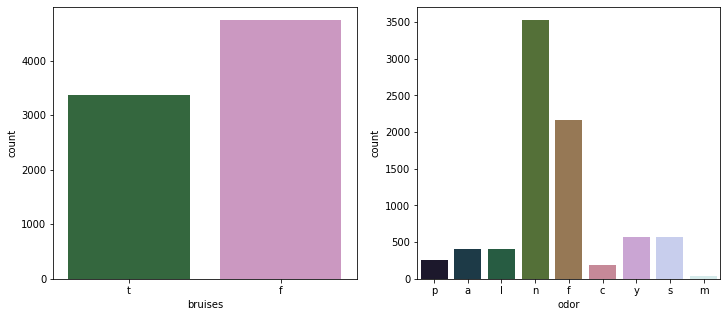

In [9]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='bruises', palette='cubehelix')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='odor', palette='cubehelix')

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

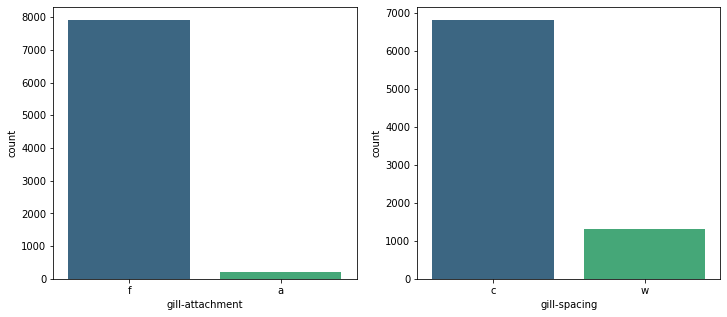

In [10]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='gill-attachment', palette='viridis')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='gill-spacing', palette='viridis')

<AxesSubplot:xlabel='gill-color', ylabel='count'>

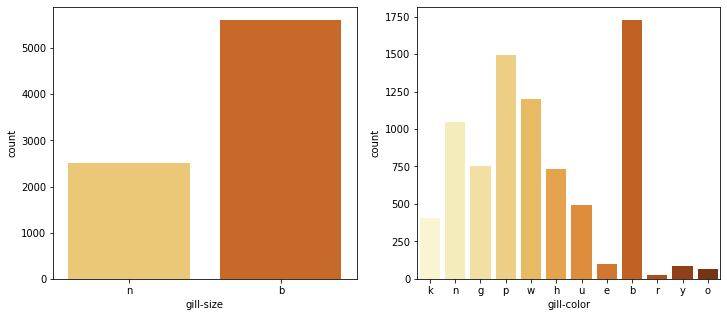

In [11]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='gill-size', palette='YlOrBr')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='gill-color', palette='YlOrBr')

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

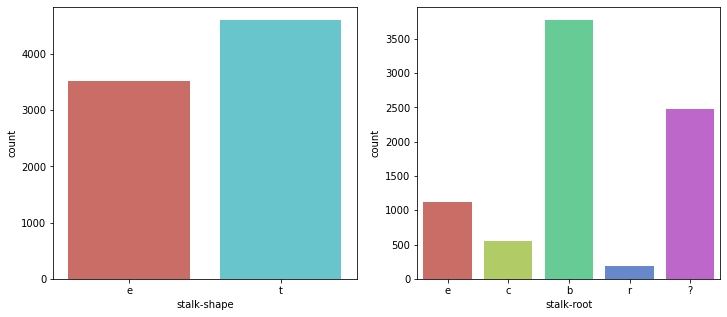

In [12]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='stalk-shape', palette='hls')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='stalk-root', palette='hls')

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

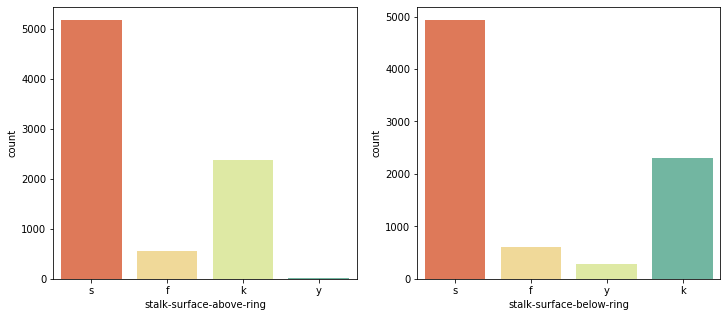

In [13]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='stalk-surface-above-ring', palette='Spectral')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='stalk-surface-below-ring', palette='Spectral')

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

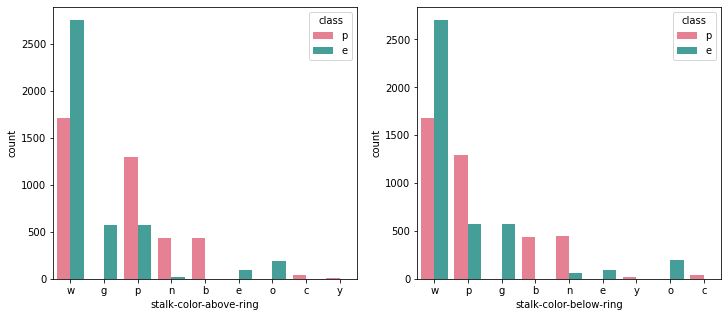

In [14]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='stalk-color-above-ring', hue = 'class', palette='husl')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='stalk-color-below-ring', hue = 'class', palette='husl')

<AxesSubplot:xlabel='veil-color', ylabel='count'>

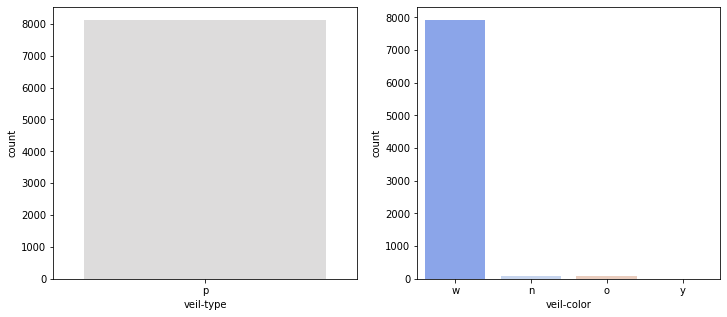

In [15]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,3)
sns.countplot(data=mushroom,x='veil-type', palette='coolwarm')
ax = fig.add_subplot(1,4,4)
sns.countplot(data=mushroom,x='veil-color', palette='coolwarm')

<AxesSubplot:xlabel='ring-type', ylabel='count'>

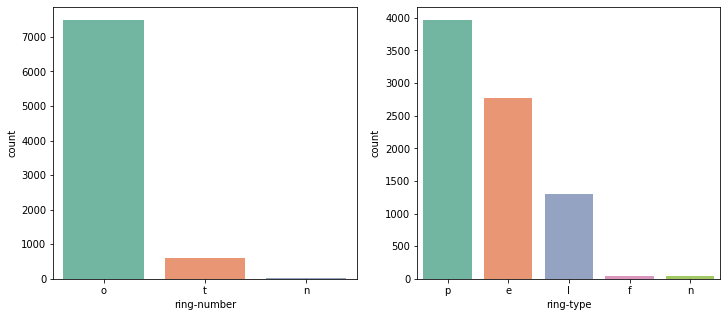

In [16]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='ring-number', palette='Set2')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='ring-type', palette='Set2')

<AxesSubplot:xlabel='habitat', ylabel='count'>

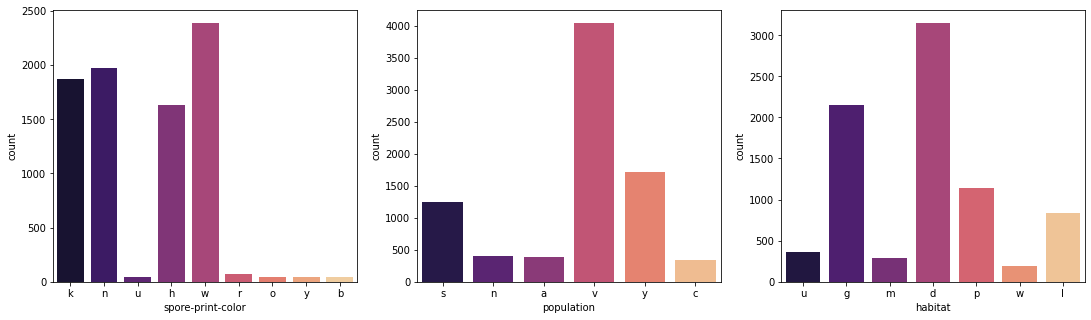

In [17]:
fig = plt.figure(figsize = (25,5))
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='spore-print-color', palette='magma')
ax = fig.add_subplot(1,4,2)
sns.countplot(data=mushroom,x='population', palette='magma')
ax = fig.add_subplot(1,4,3)
sns.countplot(data=mushroom,x='habitat', palette='magma')

In [18]:
# Encoding the categorical values
encoder=LabelEncoder()
for col in mushroom.columns:
    mushroom[col]=encoder.fit_transform(mushroom[col])
mushroom.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


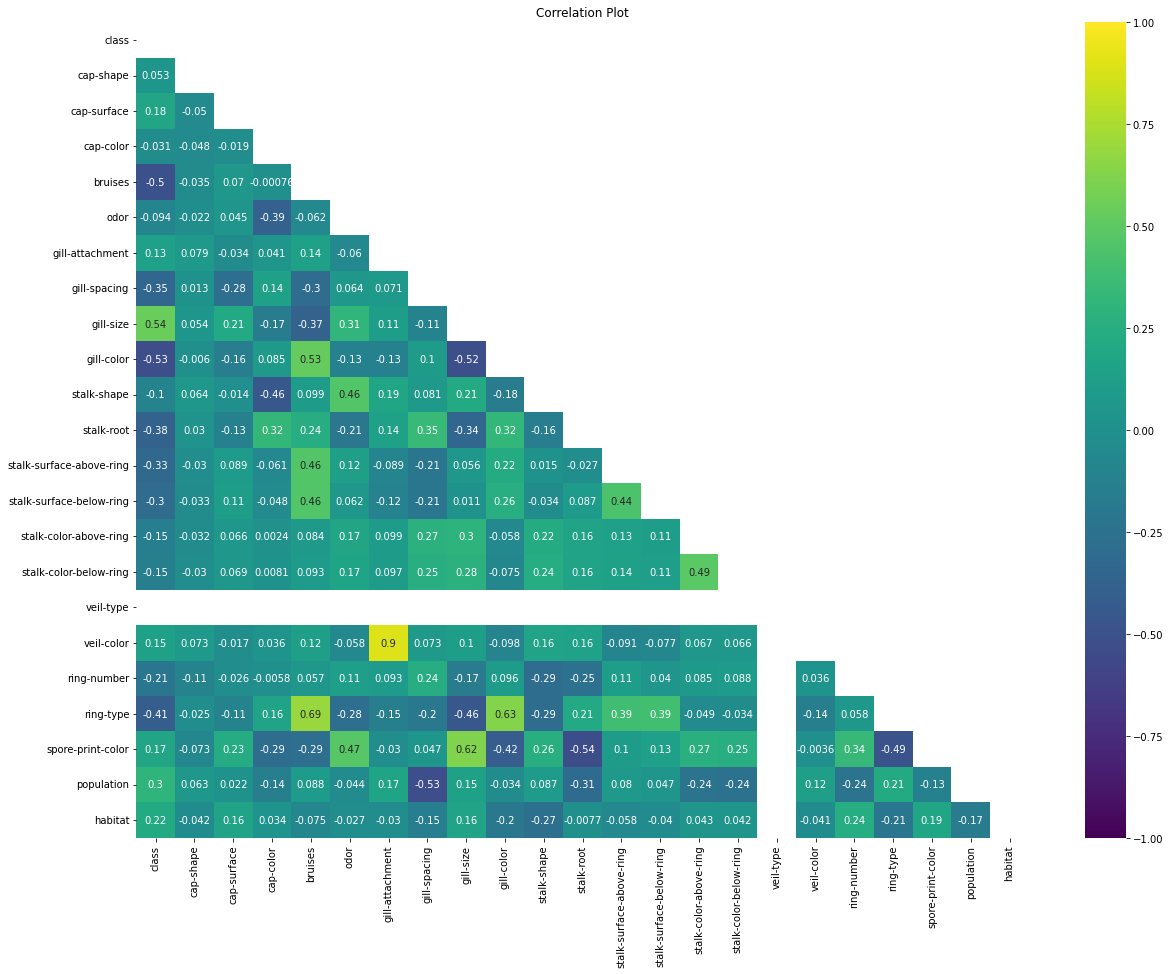

In [19]:
mush_corr = mushroom.corr()
plt.figure(figsize=(20, 15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(mushroom.corr(), dtype=bool))
heatmap = sns.heatmap(mushroom.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16);
plt.title("Correlation Plot")
plt.show()

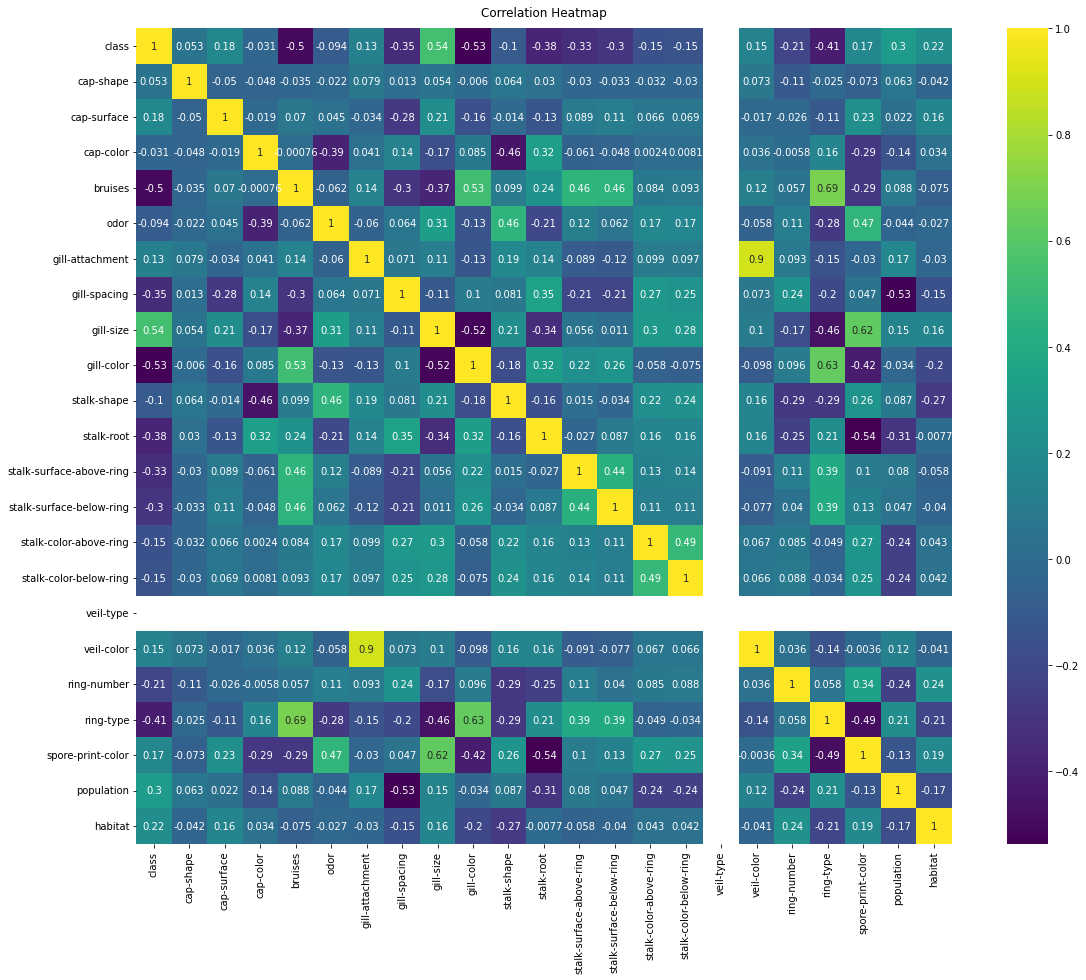

In [20]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(mushroom.corr(), annot=True, square=True, cmap='viridis')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()
plt.close()


<AxesSubplot:xlabel='veil-type', ylabel='count'>

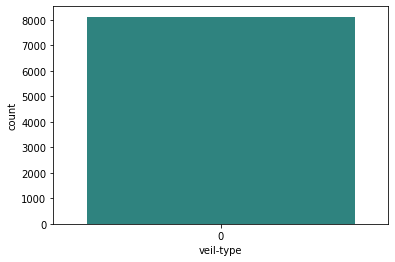

In [21]:
ax = fig.add_subplot(1,4,1)
sns.countplot(data=mushroom,x='veil-type', palette='viridis')

In [22]:
#Droppig Column
zero_cols = [ col for col, is_zero in ((mushroom == 0).sum() == mushroom.shape[0]).items() if is_zero ]
print (zero_cols)
mushroom.drop(zero_cols, axis=1, inplace=True)

['veil-type']


In [23]:
(mushroom['ring-number'] == 0).sum()
# ((mushroom == 0).sum() == mushroom.shape[0])

36

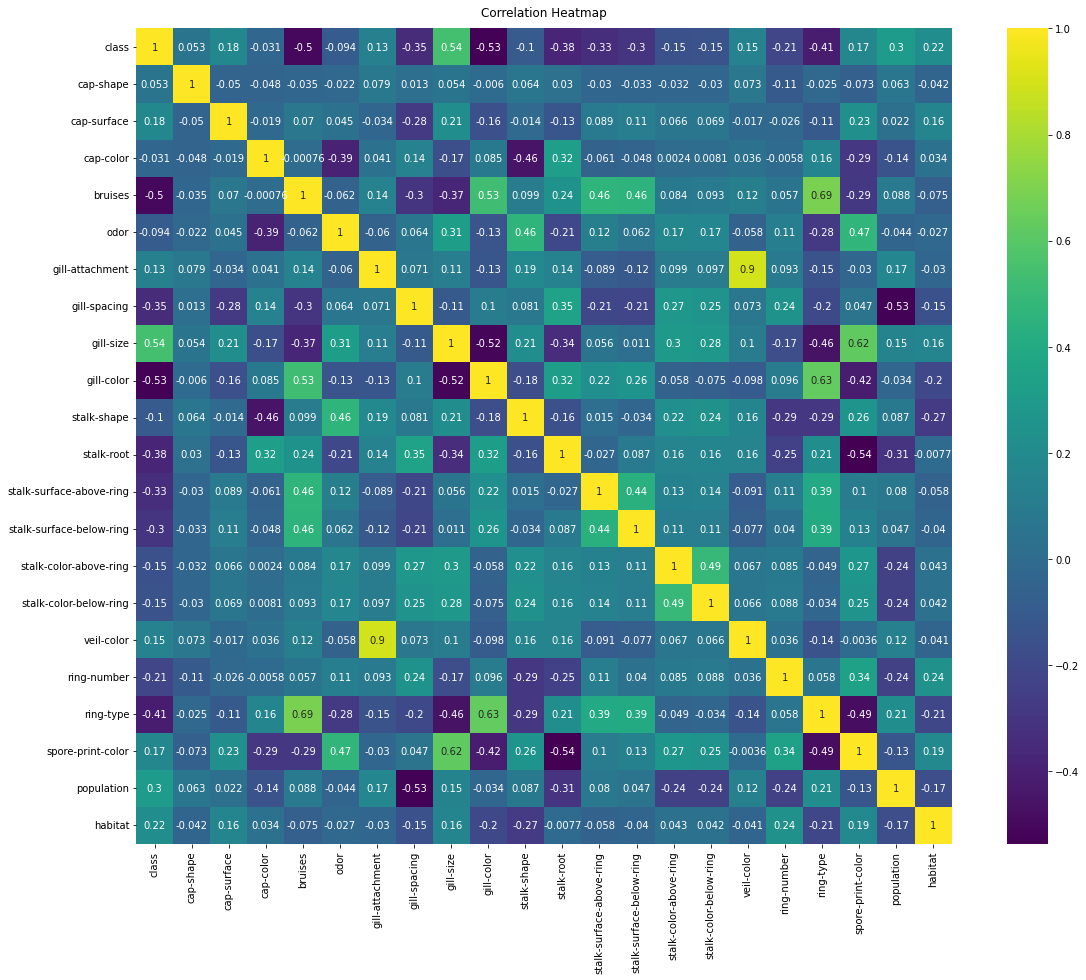

In [24]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(mushroom.corr(), annot=True, square=True, cmap='viridis')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()
plt.close()


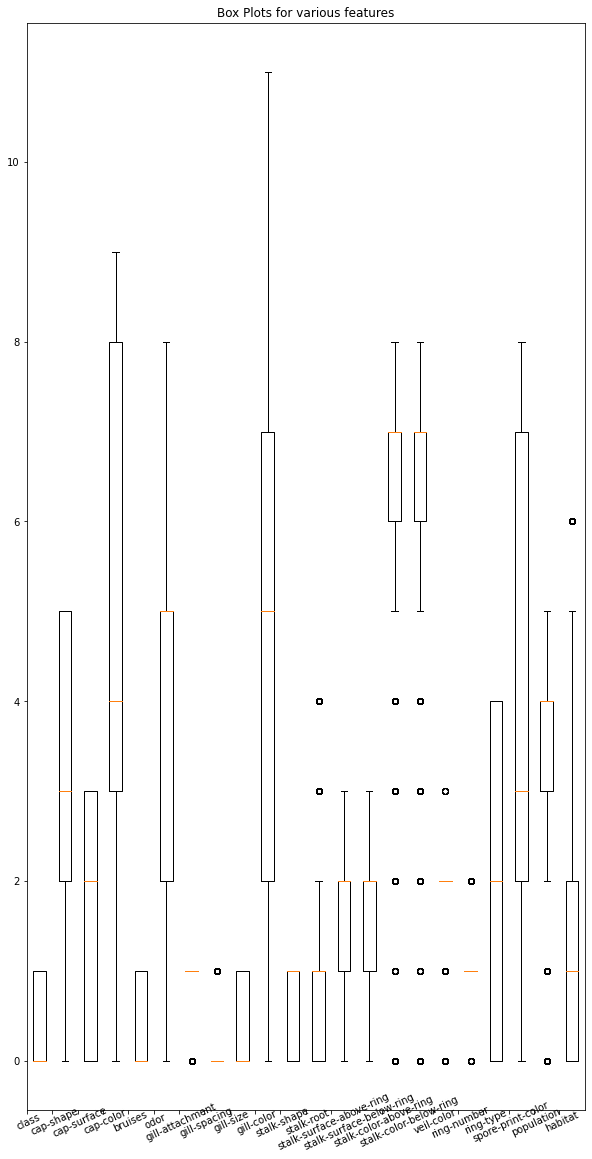

In [25]:
NUM_POINTS = 22
features= list(mushroom.columns[0:NUM_POINTS])

fig, ax = plt.subplots(figsize=(10,20))
ax.boxplot(mushroom)

# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(features, rotation=25, rotation_mode="anchor",fontsize=10)

plt.title("Box Plots for various features")
plt.show()
plt.close()

# Kmeans

In [26]:
data = pd.read_csv('mushrooms.csv')

In [27]:
#Dropping the column
data = data.drop(['veil-type'],axis = 1)

In [28]:
y = data['class']
X = data.drop(['class'] , axis  = 1)

In [29]:
for cols in X.columns:
    if(len(X[cols].value_counts()) ==2):#binary categories
        le_anima = preprocessing.LabelEncoder()
        X[cols] = le_anima.fit_transform(X[cols])

In [30]:
X = pd.get_dummies(X)

In [31]:
#encoding target labels
y = y.map(dict(e=1, p=0))

In [32]:
np.random.seed(477)

X_values = X
y_values = y
data = scale(X_values)

n_samples, n_features = data.shape
n_types = len(np.unique(y_values))
labels = y_values

sample_size = 300

print("n_types: %d, \t n_samples %d, \t n_features %d"
      % (n_types, n_samples, n_features))

n_types: 2, 	 n_samples 8124, 	 n_features 111


In [33]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    
        
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1],(time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [34]:
print('\n-------------- Metrics before PCA -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')



    
bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=data)


-------------- Metrics before PCA -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	111	0.09s	829117	0.594	0.618	0.606	0.635	0.606	0.101


In [35]:
print(82 * '_')

print('\n-------------- Metrics after PCA with r=48 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=48).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

__________________________________________________________________________________

-------------- Metrics after PCA with r=48 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	48	0.04s	729171	0.587	0.611	0.599	0.633	0.599	0.114


In [36]:
print(82 * '_')

print('\n-------------- Metrics after PCA with r=24 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=24).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

__________________________________________________________________________________

-------------- Metrics after PCA with r=24 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	24	0.04s	543820	0.587	0.611	0.599	0.633	0.599	0.163


In [37]:
print(82 * '_')

print('\n-------------- Metrics after PCA with r=2 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data)

__________________________________________________________________________________

-------------- Metrics after PCA with r=2 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.03s	78247	0.574	0.596	0.585	0.626	0.585	0.574


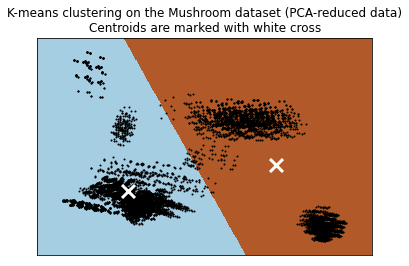

In [38]:
#The dataset initially contains 111 features after categorical encoding.
#PCA is used to reduce these features into a desired number of principle components to optimize performance.
#The optimal value is chosen by examining the metrics against the reduced data.




#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init.", data=data)

#


#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init", data=reduced_data)
# #############################################################################
# Visualize the results on PCA-reduced data

#reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
#kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Mushroom dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**Observation:**

It can be observed from the above table that the performace has improved with dimensionality reduction. Going by the improvement in metrics, especially a significant jump of the silhoutte score which indicates the mean intra-cluster distance and the mean nearest-cluster distance for a sample, which ranges between -1, being the worst and 1 being the best score, r=2 is chosen for PCA.

**Determining K value**

Different values of K ranging from 1 to 9 are used to calculate inertia (or total within-cluster sum of squares) and Average Silhouette score for each value of K.

In [39]:
pca = PCA(n_components=2).fit(X)
pca_2 = pca.transform(X)

Text(0, 0.5, 'Total within-cluster sum of squares')

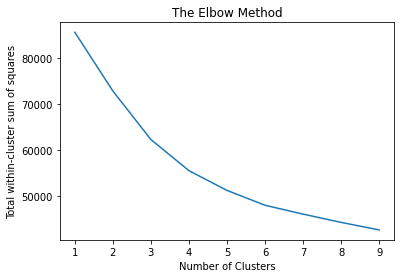

In [40]:
#To find appropriate k value
twss=[]
sa=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

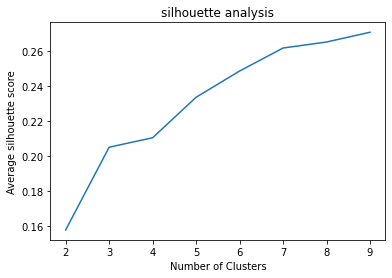

In [41]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.1578442723522316


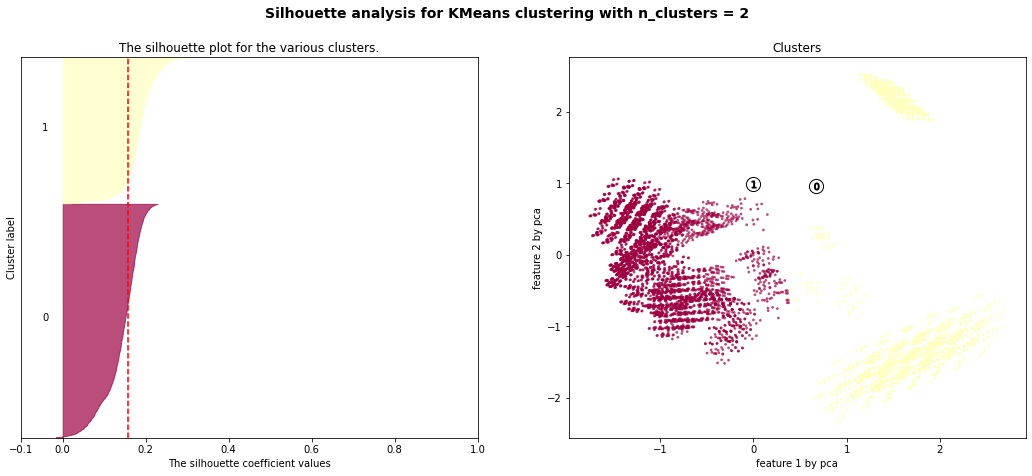

For n_clusters = 3 The average silhouette_score is : 0.20502879374121666


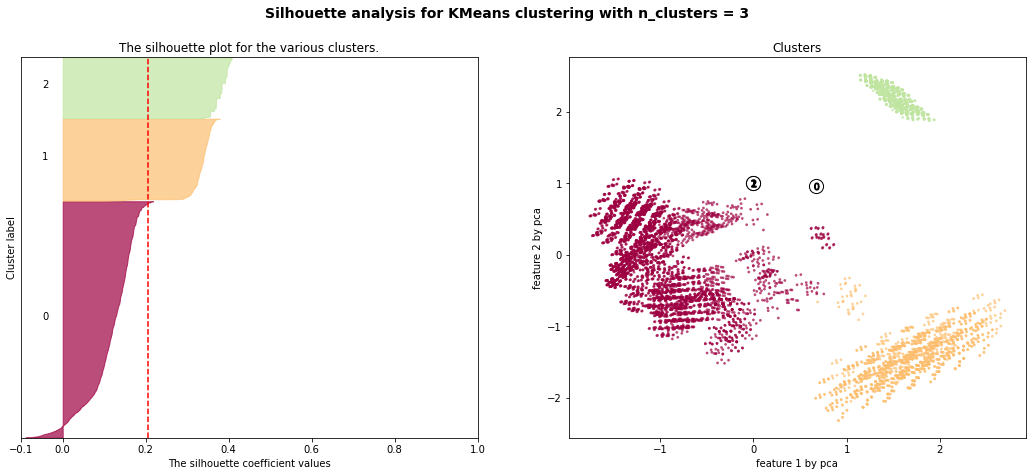

For n_clusters = 4 The average silhouette_score is : 0.21043413105310402


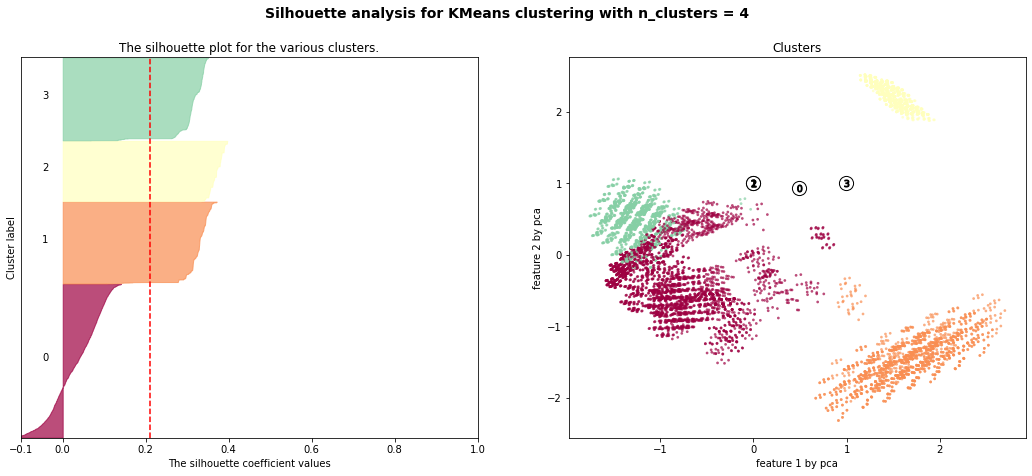

For n_clusters = 5 The average silhouette_score is : 0.2335300576808903


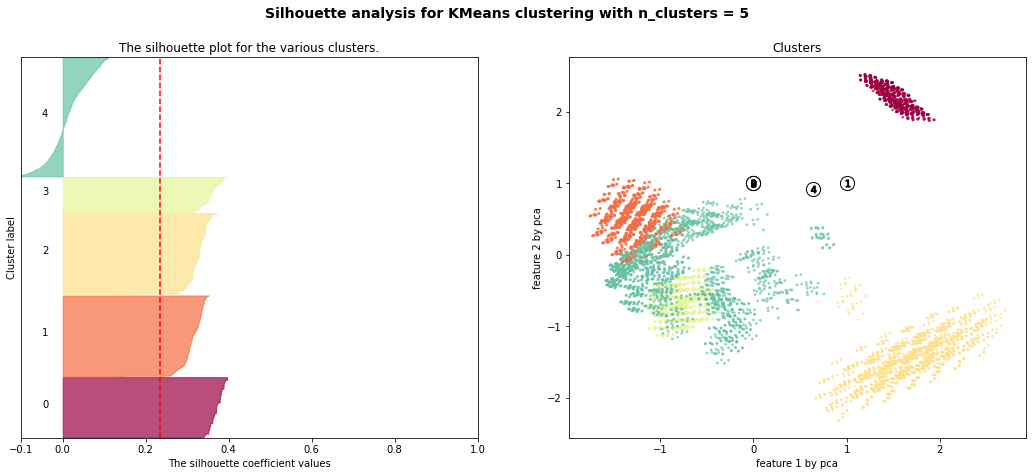

For n_clusters = 6 The average silhouette_score is : 0.24885156982880144


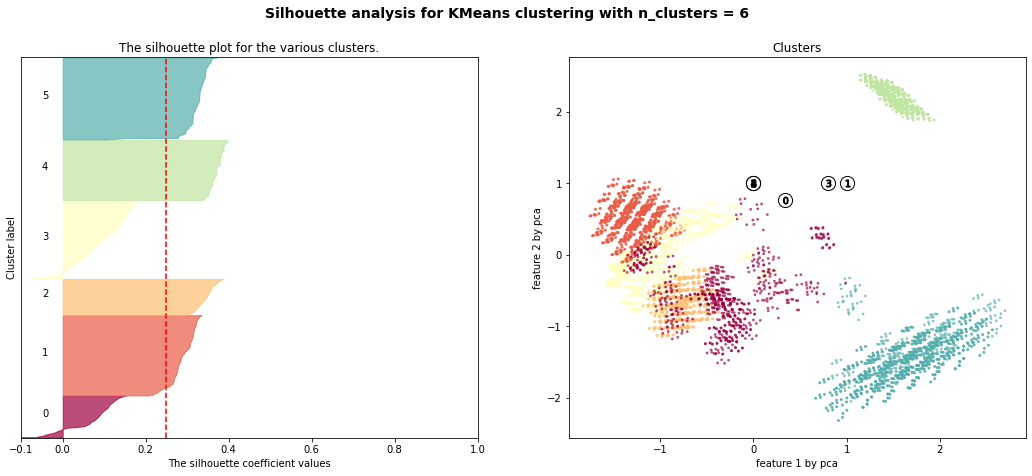

In [42]:
for n_clusters in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
    
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2[:, 0], pca_2[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("feature 1 by pca")
    ax2.set_ylabel("feature 2 by pca")

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**Observation:**

It can be observed from the above plots that K=2 does not have a negative silhouette value and the samples are uniform. Generally K value with good average silhoutte value and a uniform sample distribution is considered ideal. Although in this case we know that there are only 2 clusters, edible and poisonous, this method provides a validation for chosing an appropriate K value. 
Therefore K=2 is indeed the appropriate K-value.

**Fitting and plotting clusters**

In [43]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')
kmeans.fit(X)
Ypreds=kmeans.predict(X)

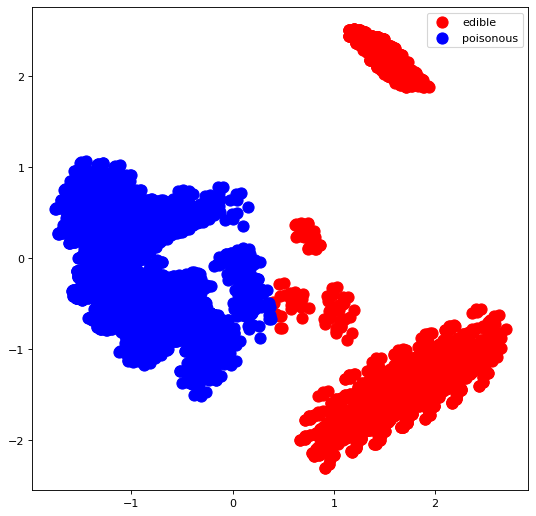

In [44]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(pca_2[Ypreds == 0, 0], pca_2[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(pca_2[Ypreds == 1, 0], pca_2[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.legend()

**Observation:** 

Homogenous clusters

# Naive Bayes

In [45]:
nb_data = pd.read_csv('mushrooms.csv')

In [46]:
# Categorical data converted to numerical data
encoder = LabelEncoder()

# Apply the encoder to each of the columns
en_nb_data = nb_data.apply(encoder.fit_transform)

en_nb_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [47]:
# Seperating our target and features
nb_X = en_nb_data.drop(columns = ['class'])
nb_y = en_nb_data['class']

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size = 0.3)

print("X_train = ", nb_X_train.shape)
print("y_train = ", nb_y_train.shape)
print("X_test = ", nb_X_test.shape)
print("y_test = ", nb_y_test.shape)

X_train =  (5686, 22)
y_train =  (5686,)
X_test =  (2438, 22)
y_test =  (2438,)


In [48]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [49]:
model = GaussianNB()
model.fit(nb_X_train,nb_y_train)

GaussianNB()

In [50]:
nb_pred=model.predict(nb_X_test)

In [51]:
print("Model score:",model.score(nb_X_test,nb_y_test))
print("Mean absolute error:",mean_absolute_error(nb_pred,nb_y_test))
print("Accuracy score:",accuracy_score(nb_pred,nb_y_test))

Model score: 0.9150943396226415
Mean absolute error: 0.08490566037735849
Accuracy score: 0.9150943396226415


In [52]:
print(classification_report(nb_y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1258
           1       0.90      0.93      0.91      1180

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [53]:
print("Confusion Matrix\n:", confusion_matrix(nb_y_test,nb_pred))

Confusion Matrix
: [[1139  119]
 [  88 1092]]


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


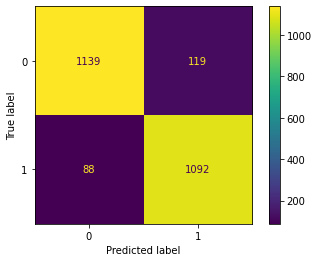

In [54]:
plot_confusion_matrix(model, nb_X_test, nb_y_test)  
plt.show()

In [55]:
nb_pred_prob = model.predict_proba(nb_X_test)
print("ROC_AUC score:\n", roc_auc_score(nb_y_test, nb_pred_prob[:,1]))

ROC_AUC score:
 0.947990487995473


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


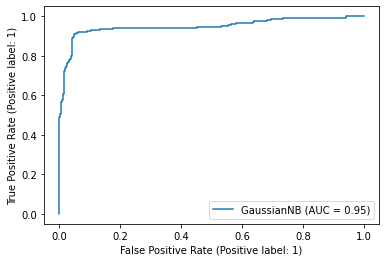

In [56]:
plot_roc_curve(model, nb_X_test, nb_y_test)

In [57]:
model2 = CategoricalNB()
model2.fit(nb_X_train,nb_y_train)

CategoricalNB()

In [58]:
nb_pred1 = model2.predict(nb_X_test)

In [59]:
print("Model score:",model2.score(nb_X_test,nb_y_test))
print("Mean absolute error:",mean_absolute_error(nb_pred1,nb_y_test))
print("Accuracy score:",accuracy_score(nb_pred1,nb_y_test))

Model score: 0.9515996718621821
Mean absolute error: 0.04840032813781788
Accuracy score: 0.9515996718621821


In [60]:
print(classification_report(nb_y_test,nb_pred1))
print("Confusion Matrix\n:", confusion_matrix(nb_y_test,nb_pred1))
nb_pred_prob1 = model2.predict_proba(nb_X_test)
print("ROC_AUC score:\n", roc_auc_score(nb_y_test, nb_pred_prob1[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1258
           1       0.99      0.91      0.95      1180

    accuracy                           0.95      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

Confusion Matrix
: [[1248   10]
 [ 108 1072]]
ROC_AUC score:
 0.9974643636657596


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


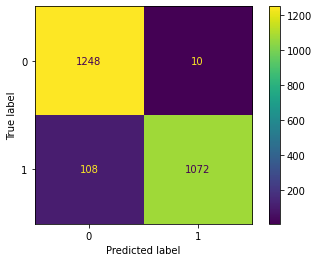

In [61]:
plot_confusion_matrix(model2, nb_X_test, nb_y_test)  
plt.show()

C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


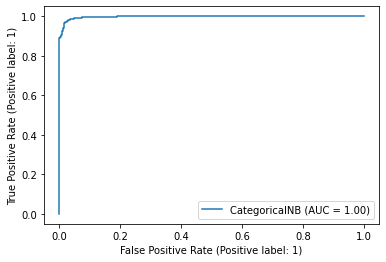

In [62]:
plot_roc_curve(model2, nb_X_test, nb_y_test)

Gaussian NB:
 0.923848 (0.012846)
Confusion Matrix:
 [[1154  104]
 [ 101 1079]]
Mean absolute error: 0.0840853158326497
Accuracy score: 0.9159146841673503
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1258
           1       0.91      0.91      0.91      1180

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



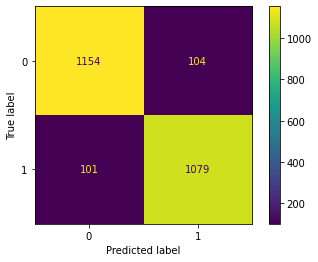

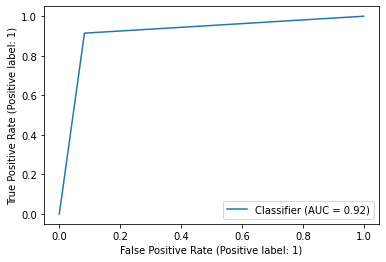

Categorical NB:
 0.953221 (0.010307)
Confusion Matrix:
 [[1247   11]
 [ 137 1043]]
Mean absolute error: 0.06070549630844955
Accuracy score: 0.9392945036915504
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1258
           1       0.99      0.88      0.93      1180

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



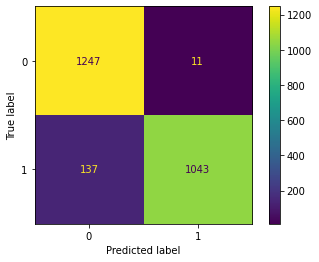

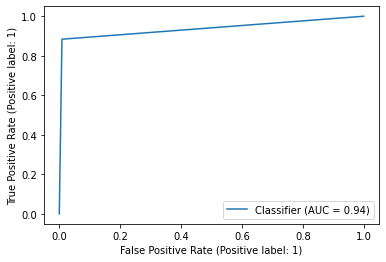

In [63]:
models = []
models.append(('Gaussian NB', GaussianNB()))
models.append(('Categorical NB', CategoricalNB()))

# evaluate each model in turn
results = []
names = []
prob = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, nb_X_train, nb_y_train, cv=kfold, scoring='accuracy')
    cv_pred = cross_val_predict(model, nb_X_test, nb_y_test, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s:\n %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("Confusion Matrix:\n", confusion_matrix(nb_y_test,cv_pred))
    print("Mean absolute error:",mean_absolute_error(cv_pred,nb_y_test))
    print("Accuracy score:",accuracy_score(cv_pred,nb_y_test))
    print(classification_report(nb_y_test,cv_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(nb_y_test,cv_pred))
    disp.plot()
    plt.show()
    RocCurveDisplay.from_predictions(nb_y_test, cv_pred)
    plt.show()

# Decision Tree, Gradient Boosting and Random Forest Classifiers

In [64]:
Mushroom_Classification = pd.read_csv('mushrooms.csv') # read the dataset

In [65]:
le = LabelEncoder()
for i in Mushroom_Classification.columns:
    Mushroom_Classification[i] = le.fit_transform(Mushroom_Classification[i])
Mushroom_Classification

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [66]:
zero_cols = [ col for col, is_zero in ((Mushroom_Classification == 0).sum() == Mushroom_Classification.shape[0]).items() if is_zero ]
print (zero_cols)

['veil-type']


In [67]:
Mushroom_Classification.drop(zero_cols, axis=1, inplace=True)

In [68]:
NUM_POINTS = 22
features= list(Mushroom_Classification.columns[0:NUM_POINTS])
features=features[1:22]

In [69]:
# Extracting data attributes
X_data = Mushroom_Classification[features]

# Extracting target/ class labels
y = Mushroom_Classification.values[:,0] # 1 - poisonous, 0 - edible

In [70]:
sc = StandardScaler()
X=sc.fit_transform(X_data)

In [71]:
# Data split into train and test sets

# Testing data contains 20% total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print("Shape of train data :-{} labels{} ".format(X_train.shape,y_train.shape))
print("Shape of test data :-{} labels{} ".format(X_test.shape,y_test.shape))

Shape of train data :-(6499, 21) labels(6499,) 
Shape of test data :-(1625, 21) labels(1625,) 


In [72]:
# Decision Tree Classifier 
DTree = DecisionTreeClassifier(criterion = 'entropy', random_state=0) # Building a  model
clf1_DT = DTree.fit(X_train, y_train) # Training a  model
y_pred_DT =  DTree.predict(X_test) # Make predictions

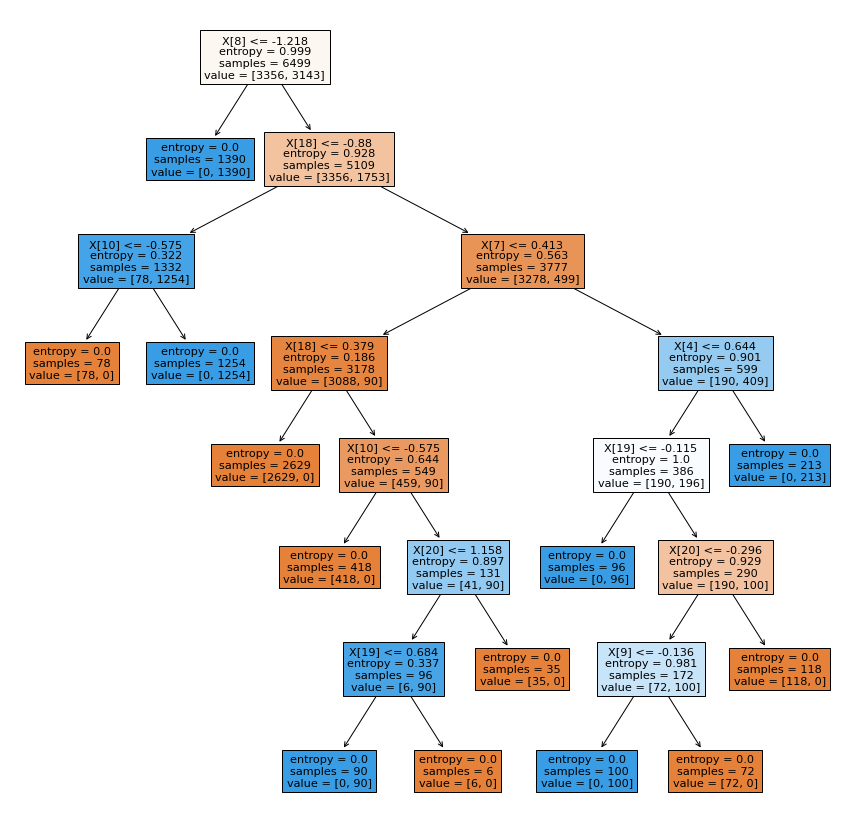

In [73]:
# Decision Tree Classifier 
plt.figure(figsize=(15,15))
plot_tree(clf1_DT, filled=True)
plt.show()

Accuracy Score on train data: 1.0
Confusion Matrix of train data: 
  [[3356    0]
 [   0 3143]]
classification report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3356
           1       1.00      1.00      1.00      3143

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


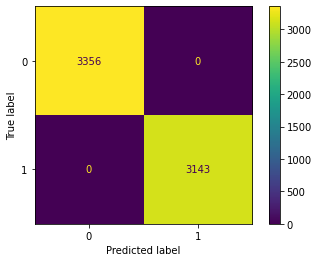

Accuracy Score on test data:   1.0
Confusion Matrix of test data:
 [[852   0]
 [  0 773]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


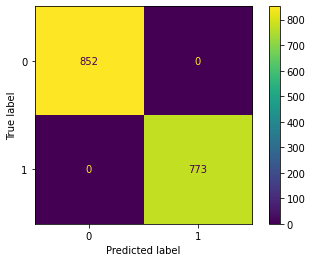

In [74]:
# Decision Tree Classifier 

# Evaluate the model on the train dataset
print('Accuracy Score on train data:', accuracy_score(y_true=y_train, y_pred=DTree.predict(X_train))) # Accuracy
print('Confusion Matrix of train data: \n ', confusion_matrix(y_true=y_train, y_pred=DTree.predict(X_train))) # ConfusionMatrix
print('classification report on train data')
print(classification_report(y_true=y_train, y_pred=DTree.predict(X_train))) # Classification Report
plot_confusion_matrix(DTree, X_train, y_train)  
plt.show()

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_DT))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_DT))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_DT))
plot_confusion_matrix(DTree, X_test, y_test)  
plt.show()

Accuracy Score on test data:   1.0
Confusion Matrix of test data:
 [[852   0]
 [  0 773]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


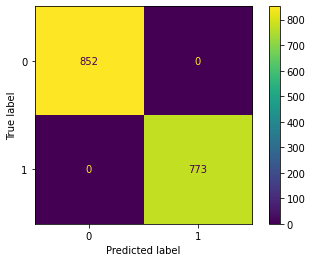

In [75]:
# Gradient Boosting Classifier

clf_XG = GradientBoostingClassifier() # Building a  model
clf_XG.fit(X_train, y_train) # Training a  model
y_pred_XG =  clf_XG.predict(X_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_XG))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_XG))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_XG))

plot_confusion_matrix(clf_XG, X_test, y_test)  
plt.show()

Accuracy Score on test data:   1.0
Confusion Matrix of test data:
 [[852   0]
 [  0 773]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


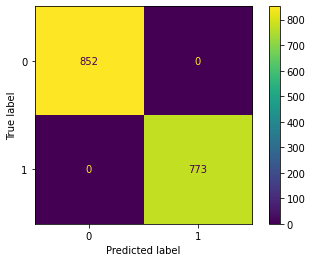

In [76]:
# Random Forest Classifier
clf_RF = RandomForestClassifier() # Building a  model
clf_RF.fit(X_train, y_train) # Training a  model
y_pred_RF =  clf_RF.predict(X_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_RF))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_RF))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_RF))

plot_confusion_matrix(clf_RF, X_test, y_test)  
plt.show()

Baseline (random guess): ROC AUC=0.500
Decision Tree: ROC AUC=1.000
Gradient Boosting: ROC AUC=1.000
Random Forest: ROC AUC=1.000


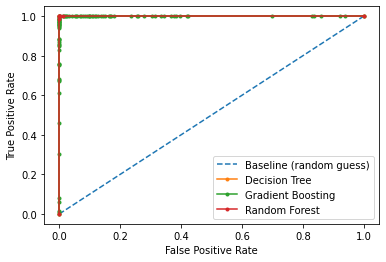

In [77]:
# ROC Curve for Decision Tree, Gradient Boosting and Random Forest

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for different models
lr_probs1 = clf1_DT.predict_proba(X_test)
lr_probs2 = clf_XG.predict_proba(X_test)
lr_probs3 = clf_RF.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc2))
print('Random Forest: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Decision Tree')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Gradient Boosting')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

DecisionTreeClassifier: 1.000000 (0.000000)
GradientBoostingClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


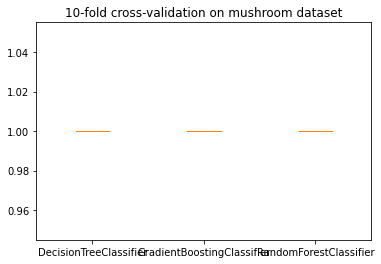

In [78]:
# Comparison of results for Decision Tree, Gradient Boosting and Random Forest Classifiers with 10 folds cross validation
# Dataset splitting
X_train1, X_validation1, Y_train1, Y_validation1 = train_test_split(X_data, y, test_size=0.20, random_state=0)
# Spot Check Algorithms
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10)
	cv_results = cross_val_score(model, X_train1, Y_train1, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on mushroom dataset')
plt.show()

# SVM

In [79]:
svm_data = pd.read_csv("mushrooms.csv")

In [80]:
encoder=LabelEncoder()
for col in svm_data.columns:
    svm_data[col]=encoder.fit_transform(svm_data[col])
svm_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [81]:
svm_data=svm_data.drop(['veil-type'], axis=1)

In [82]:
svm_X=svm_data.drop(['class'],axis=1)
svm_Y=svm_data['class']
scaler = StandardScaler()
svm_X = pd.DataFrame(scaler.fit_transform(svm_X), columns=svm_X.columns)

In [83]:
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X, svm_Y, test_size=0.25, shuffle=False)
classifier = SVC()
classifier.fit(svm_X_train, svm_y_train)

SVC()

In [84]:
svm_predicted = classifier.predict(svm_X_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       525
           1       0.94      0.97      0.95      1506

    accuracy                           0.93      2031
   macro avg       0.92      0.89      0.90      2031
weighted avg       0.93      0.93      0.93      2031


Confusion matrix:
[[ 426   99]
 [  44 1462]]


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


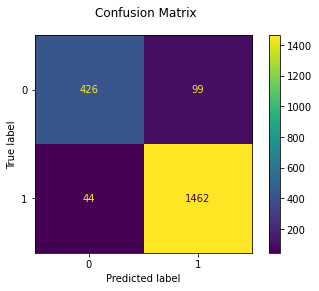

In [85]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(svm_y_test, svm_predicted)))
disp = metrics.plot_confusion_matrix(classifier, svm_X_test, svm_y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [86]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, svm_X_train, svm_y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.965517 (0.103448)


In [87]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, svm_X_train, svm_y_train, cv=kfold, scoring='f1')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.969653 (0.091040)


In [88]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(svm_X_train, svm_y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [89]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:0.9674876847290641
The best parameters: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [90]:
svc_tuned = SVC(kernel = "rbf", C = 2 , gamma = 0.1).fit(svm_X_train, svm_y_train)

In [91]:
svm_y_pred = svc_tuned.predict(svm_X_test)
accuracy_score(svm_y_test, svm_y_pred)

0.9409158050221565

Classification report for classifier SVC(C=2, gamma=0.1):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       525
           1       0.95      0.97      0.96      1506

    accuracy                           0.94      2031
   macro avg       0.93      0.91      0.92      2031
weighted avg       0.94      0.94      0.94      2031


Confusion matrix:
[[ 449   76]
 [  44 1462]]


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


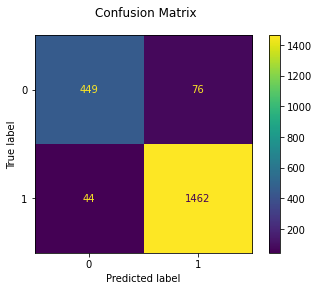

In [92]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(svm_y_test, svm_y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, svm_X_test, svm_y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [93]:
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X, svm_Y, test_size=0.20, shuffle=False)
name="SVM"
classifier = SVC()
classifier.fit(svm_X_train, svm_y_train)
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, svm_X_train, svm_y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.926717 (0.147078)


In [94]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(svm_X_train, svm_y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [95]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:0.9540832049306627
The best parameters: {'C': 2, 'gamma': 1, 'kernel': 'rbf'}


In [96]:
svc_tuned = SVC(kernel = "rbf", C = 2 , gamma = 0.1).fit(svm_X_train, svm_y_train)

In [97]:
svm_y_pred = svc_tuned.predict(svm_X_test)
accuracy_score(svm_y_test, svm_y_pred)

0.9692307692307692

Classification report for classifier SVC(C=2, gamma=0.1):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       507
           1       0.98      0.98      0.98      1118

    accuracy                           0.97      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.97      0.97      0.97      1625


Confusion matrix:
[[ 483   24]
 [  26 1092]]


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


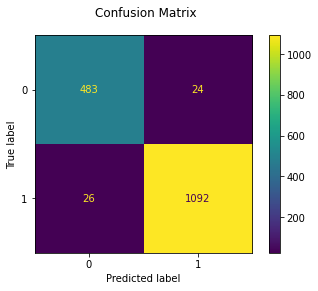

In [98]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(svm_y_test, svm_y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, svm_X_test, svm_y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [99]:
 print('roc_auc_score: ', roc_auc_score(svm_y_test, svm_y_pred))

roc_auc_score:  0.9647034539700013


In [100]:
fpr, tpr, _ = metrics.roc_curve(svm_y_test,  svm_y_pred)
auc = metrics.roc_auc_score(svm_y_test, svm_y_pred)

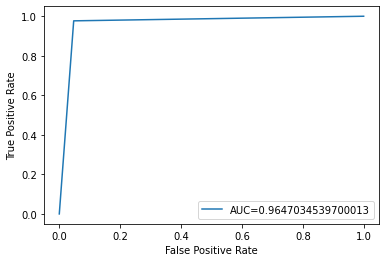

In [101]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Neural network

In [102]:
nn_data = pd.read_csv('mushrooms.csv')

In [103]:
object_1 = LabelEncoder()
# During the conversion process, we used the first projection.
for i in nn_data.columns:
    nn_data[i] = object_1.fit_transform(nn_data[i])

In [104]:
nn_data.drop(['veil-type'], axis=1, inplace=True)

In [105]:
target = nn_data["class"].values
feature = nn_data.drop(["class"], axis=1)

In [106]:
nn_x_train, nn_x_test, nn_y_train, nn_y_test = train_test_split(feature, target, test_size=0.2, random_state=11)
print(nn_x_train.shape, nn_x_test.shape, nn_y_train.shape, nn_y_test.shape)

(6499, 21) (1625, 21) (6499,) (1625,)


In [107]:
def print_report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix : \n',cm)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test,y_pred,labels=[0,1])
    print('Classification report : \n',matrix)

    #plot confusion matrix
    # sns.heatmap(cm, annot=True)
    # plt.title("Confusion Matrix")
    # plt.show()

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    #roc-auc
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()    

### (a)Perceptron

In [108]:
pptn = Perceptron(eta0=0.001, random_state=1, max_iter=400)
pptn.fit(nn_x_train, nn_y_train)
pptn_pred = pptn.predict(nn_x_test)

In [109]:
lr_probs3 = pptn.predict(nn_x_test)
# lr_probs3 = lr_probs3[:, 1]
lr_auc3 = roc_auc_score(nn_y_test, lr_probs3)
print('MLP 3 (hidden layer sizes=20): ROC AUC=%.3f' % (lr_auc3))
lr_fpr3, lr_tpr3, _ = roc_curve(nn_y_test, lr_probs3)

MLP 3 (hidden layer sizes=20): ROC AUC=0.937


Confusion matrix : 
 [[802  57]
 [ 46 720]]
Outcome values : 
 802 57 46 720
Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       859
           1       0.93      0.94      0.93       766

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



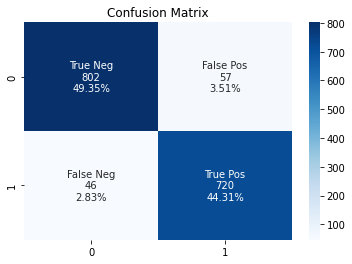

0.9367957762532789


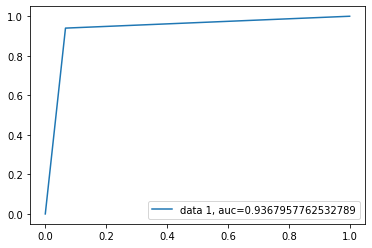

In [110]:
print_report(nn_y_test, pptn_pred)

### (b) Multi-Layer Percpetron

In [111]:
clf3 = MLPClassifier(random_state=0, activation='relu', hidden_layer_sizes=(4,), max_iter=400)
clf3.fit(nn_x_train, nn_y_train)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=400, random_state=0)

In [112]:
lr_probs3 = clf3.predict(nn_x_test)
# lr_probs3 = lr_probs3[:, 1]
lr_auc3 = roc_auc_score(nn_y_test, lr_probs3)
print('MLP 3 (hidden layer sizes=20): ROC AUC=%.3f' % (lr_auc3))
lr_fpr3, lr_tpr3, _ = roc_curve(nn_y_test, lr_probs3)

MLP 3 (hidden layer sizes=20): ROC AUC=0.999


Confusion matrix : 
 [[859   0]
 [  2 764]]
Outcome values : 
 859 0 2 764
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       766

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



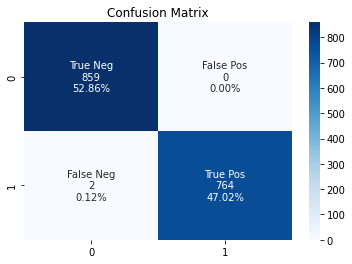

0.9986945169712793


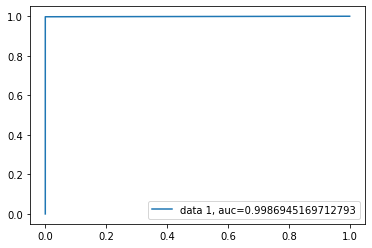

In [113]:
print_report(nn_y_test, lr_probs3)

### (c) Densely Connected Neural Network

In [114]:
def build_classifier():
    classifier = Sequential()  # initialize neural network architecture
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=nn_x_train.shape[1]))
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))  # kernel_initializer: to initialize weights
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))  # output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

In [127]:
classifier = KerasClassifier(build_fn=build_classifier)
folds = KFold(n_splits=10, random_state=1, shuffle=True).split(nn_x_train, nn_y_train)
histories = []
for train_ids, test_ids in folds:
#     classifier.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=1)
    
    x_train = nn_x_train.iloc[train_ids]
    y_train = nn_y_train[train_ids]
    x_test = nn_x_train.iloc[test_ids]
    y_test = nn_y_train[test_ids]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    history = classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=1)
    histories.append(history)
#     break
# train_ids, test_ids = next(folds)

C:\Users\Preethi\AppData\Local\Temp/ipykernel_21468/1074580105.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasClassifier(build_fn=build_classifier)


(5849, 21) (5849,) (650, 21) (650,)
Epoch 1/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6575 - val_loss: 0.6822 - val_accuracy: 0.7400
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7836 - val_loss: 0.5983 - val_accuracy: 0.7923
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8261 - val_loss: 0.4567 - val_accuracy: 0.8338
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8533 - val_loss: 0.3741 - val_accuracy: 0.8692
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8680 - val_loss: 0.3394 - val_accuracy: 0.8677
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8810 - val_loss: 0.3094 - val_accuracy: 0.8785
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.8931 - val_loss: 0.2795 

46/46 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9759 - val_loss: 0.0947 - val_accuracy: 0.9677
Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.0885 - val_accuracy: 0.9708
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9786 - val_loss: 0.0958 - val_accuracy: 0.9646
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0813 - val_accuracy: 0.9723
Epoch 62/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0780 - val_accuracy: 0.9754
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.0781 - val_accuracy: 0.9800
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9831 - val_loss: 0.0736 - val_accuracy: 0.9769
Epoch 65/100
46/46 

46/46 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9385 - val_loss: 0.1699 - val_accuracy: 0.9477
Epoch 16/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9408 - val_loss: 0.1569 - val_accuracy: 0.9446
Epoch 17/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9439 - val_loss: 0.1551 - val_accuracy: 0.9462
Epoch 18/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9461 - val_loss: 0.1479 - val_accuracy: 0.9446
Epoch 19/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9468 - val_loss: 0.1455 - val_accuracy: 0.9462
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9480 - val_loss: 0.1419 - val_accuracy: 0.9508
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9509 - val_loss: 0.1396 - val_accuracy: 0.9492
Epoch 22/100
46/46 

Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9894 - val_loss: 0.0352 - val_accuracy: 0.9923
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9896 - val_loss: 0.0342 - val_accuracy: 0.9954
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9904 - val_loss: 0.0332 - val_accuracy: 0.9938
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9889 - val_loss: 0.0325 - val_accuracy: 0.9954
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9903 - val_loss: 0.0332 - val_accuracy: 0.9908
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9911 - val_loss: 0.0296 - val_accuracy: 0.9969
Epoch 79/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9885 - val_loss: 0.0295 - val_accuracy: 0.9969
Epoch 

46/46 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9496 - val_loss: 0.2083 - val_accuracy: 0.9400
Epoch 31/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1612 - accuracy: 0.9520 - val_loss: 0.2083 - val_accuracy: 0.9354
Epoch 32/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9521 - val_loss: 0.2033 - val_accuracy: 0.9446
Epoch 33/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9530 - val_loss: 0.2026 - val_accuracy: 0.9369
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9525 - val_loss: 0.1979 - val_accuracy: 0.9477
Epoch 35/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9526 - val_loss: 0.1957 - val_accuracy: 0.9431
Epoch 36/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1490 - accuracy: 0.9540 - val_loss: 0.1957 - val_accuracy: 0.9400
Epoch 37/100
46/46 

Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9745 - val_loss: 0.0940 - val_accuracy: 0.9554
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9757 - val_loss: 0.0947 - val_accuracy: 0.9508
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9754 - val_loss: 0.0925 - val_accuracy: 0.9631
Epoch 91/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9769 - val_loss: 0.0909 - val_accuracy: 0.9615
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9757 - val_loss: 0.0958 - val_accuracy: 0.9585
Epoch 93/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9764 - val_loss: 0.0897 - val_accuracy: 0.9646
Epoch 94/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.0917 - val_accuracy: 0.9585
Epoch 

46/46 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9774 - val_loss: 0.0855 - val_accuracy: 0.9723
Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9773 - val_loss: 0.0776 - val_accuracy: 0.9723
Epoch 47/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9788 - val_loss: 0.0753 - val_accuracy: 0.9785
Epoch 48/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9790 - val_loss: 0.0723 - val_accuracy: 0.9815
Epoch 49/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9814 - val_loss: 0.0794 - val_accuracy: 0.9738
Epoch 50/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9832 - val_loss: 0.0791 - val_accuracy: 0.9738
Epoch 51/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9844 - val_loss: 0.0658 - val_accuracy: 0.9862
Epoch 52/100
46/46 

46/46 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7003 - val_loss: 0.5990 - val_accuracy: 0.7800
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7837 - val_loss: 0.5180 - val_accuracy: 0.8400
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.8419 - val_loss: 0.4690 - val_accuracy: 0.8708
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8649 - val_loss: 0.4332 - val_accuracy: 0.8769
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8822 - val_loss: 0.4083 - val_accuracy: 0.9046
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8964 - val_loss: 0.3900 - val_accuracy: 0.9031
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.9022 - val_loss: 0.3779 - val_accuracy: 0.9138
Epoch 9/100
46/46 [======

Epoch 60/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9884 - val_loss: 0.0788 - val_accuracy: 0.9892
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9887 - val_loss: 0.0755 - val_accuracy: 0.9938
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9885 - val_loss: 0.0754 - val_accuracy: 0.9923
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9887 - val_loss: 0.0727 - val_accuracy: 0.9938
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9885 - val_loss: 0.0716 - val_accuracy: 0.9923
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9891 - val_loss: 0.0701 - val_accuracy: 0.9938
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9891 - val_loss: 0.0684 - val_accuracy: 0.9938
Epoch 

46/46 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9532 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 18/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9544 - val_loss: 0.1775 - val_accuracy: 0.9415
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1363 - accuracy: 0.9573 - val_loss: 0.1689 - val_accuracy: 0.9446
Epoch 20/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9590 - val_loss: 0.1590 - val_accuracy: 0.9462
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9610 - val_loss: 0.1511 - val_accuracy: 0.9523
Epoch 22/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.9660 - val_loss: 0.1443 - val_accuracy: 0.9600
Epoch 23/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9687 - val_loss: 0.1401 - val_accuracy: 0.9646
Epoch 24/100
46/46 

Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9988 - val_loss: 0.0175 - val_accuracy: 0.9877
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.0161 - val_accuracy: 0.9923
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.0160 - val_accuracy: 0.9923
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.0154 - val_accuracy: 0.9938
Epoch 79/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 0.0146 - val_accuracy: 0.9954
Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9993 - val_loss: 0.0165 - val_accuracy: 0.9877
Epoch 81/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0158 - val_accuracy: 0.9892
Epoch 

46/46 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9583 - val_loss: 0.1259 - val_accuracy: 0.9446
Epoch 33/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9610 - val_loss: 0.1211 - val_accuracy: 0.9462
Epoch 34/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9603 - val_loss: 0.1230 - val_accuracy: 0.9431
Epoch 35/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9612 - val_loss: 0.1124 - val_accuracy: 0.9508
Epoch 36/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9646 - val_loss: 0.1071 - val_accuracy: 0.9585
Epoch 37/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9655 - val_loss: 0.1020 - val_accuracy: 0.9646
Epoch 38/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9694 - val_loss: 0.1003 - val_accuracy: 0.9585
Epoch 39/100
46/46 

Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9986 - val_loss: 0.0198 - val_accuracy: 0.9985
Epoch 91/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9985 - val_loss: 0.0193 - val_accuracy: 0.9985
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9986 - val_loss: 0.0200 - val_accuracy: 0.9985
Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9986 - val_loss: 0.0190 - val_accuracy: 0.9985
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9986 - val_loss: 0.0185 - val_accuracy: 0.9985
Epoch 95/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9985 - val_loss: 0.0186 - val_accuracy: 0.9985
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9986 - val_loss: 0.0176 - val_accuracy: 0.9985
Epoch 

46/46 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9608 - val_loss: 0.0905 - val_accuracy: 0.9723
Epoch 48/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9627 - val_loss: 0.0937 - val_accuracy: 0.9646
Epoch 49/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9617 - val_loss: 0.0848 - val_accuracy: 0.9738
Epoch 50/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9629 - val_loss: 0.0828 - val_accuracy: 0.9738
Epoch 51/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9644 - val_loss: 0.0840 - val_accuracy: 0.9677
Epoch 52/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9650 - val_loss: 0.0776 - val_accuracy: 0.9738
Epoch 53/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9651 - val_loss: 0.0763 - val_accuracy: 0.9723
Epoch 54/100
46/46 

46/46 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8519 - val_loss: 0.3729 - val_accuracy: 0.8662
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8714 - val_loss: 0.3392 - val_accuracy: 0.8800
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8796 - val_loss: 0.3121 - val_accuracy: 0.8846
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8930 - val_loss: 0.2957 - val_accuracy: 0.8954
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.9036 - val_loss: 0.2787 - val_accuracy: 0.8969
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.9121 - val_loss: 0.2710 - val_accuracy: 0.9092
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.9162 - val_loss: 0.2566 - val_accuracy: 0.9108
Epoch 11/100
46/46 [====

Epoch 62/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9850 - val_loss: 0.0587 - val_accuracy: 0.9815
Epoch 63/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9862 - val_loss: 0.0623 - val_accuracy: 0.9800
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9858 - val_loss: 0.0570 - val_accuracy: 0.9815
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9873 - val_loss: 0.0519 - val_accuracy: 0.9877
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9884 - val_loss: 0.0496 - val_accuracy: 0.9892
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.0515 - val_accuracy: 0.9815
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9894 - val_loss: 0.0553 - val_accuracy: 0.9815
Epoch 

46/46 [==============================] - 0s 3ms/step - loss: 0.1562 - accuracy: 0.9458 - val_loss: 0.1359 - val_accuracy: 0.9553
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.9491 - val_loss: 0.1282 - val_accuracy: 0.9599
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9485 - val_loss: 0.1326 - val_accuracy: 0.9507
Epoch 22/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9499 - val_loss: 0.1220 - val_accuracy: 0.9615
Epoch 23/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9470 - val_loss: 0.1221 - val_accuracy: 0.9569
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1363 - accuracy: 0.9523 - val_loss: 0.1191 - val_accuracy: 0.9646
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9509 - val_loss: 0.1159 - val_accuracy: 0.9599
Epoch 26/100
46/46 

Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9961 - val_loss: 0.0224 - val_accuracy: 0.9954
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9962 - val_loss: 0.0215 - val_accuracy: 0.9938
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9962 - val_loss: 0.0207 - val_accuracy: 0.9954
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9962 - val_loss: 0.0217 - val_accuracy: 0.9908
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.0195 - val_accuracy: 0.9938
Epoch 82/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9956 - val_loss: 0.0173 - val_accuracy: 0.9985
Epoch 83/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.0176 - val_accuracy: 0.9969
Epoch 

In [128]:
history = histories[-1]

In [129]:
nn_y_pred = classifier.predict(nn_x_test)

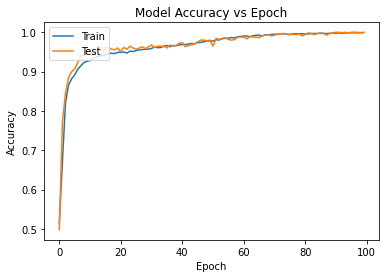

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

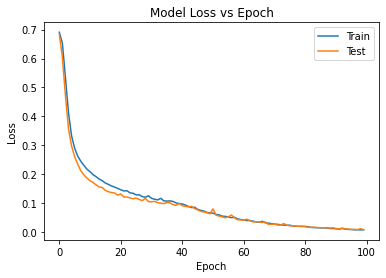

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Confusion matrix : 
 [[859   0]
 [  3 763]]
Outcome values : 
 859 0 3 763
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       766

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



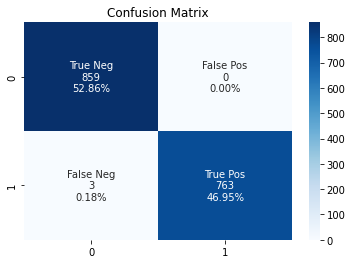

0.9980417754569191


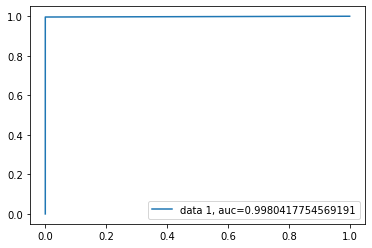

In [132]:
# confusion matrix
print_report(nn_y_test, nn_y_pred)